In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import re
from textblob import TextBlob as tb
from autocorrect import Speller as sp
import emoji
import nltk
from nltk.tokenize import word_tokenize as wt,sent_tokenize as st
from nltk.corpus import stopwords
from nltk import PorterStemmer,LancasterStemmer,SnowballStemmer
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer,PowerTransformer,LabelEncoder
from collections import Counter
import pickle
from nltk.tokenize import word_tokenize,sent_tokenize

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1.Problem Statement

Create a model for predict that coment/text belongs to which type of tweet (positive/negative/neutral)

# 2. Data Collection 

In [3]:
data=pd.read_csv(r"C:\Users\pavan\Desktop\satya\Machine learning\Projects\training.1600000.processed.noemoticon.csv",encoding= 'latin-1',header= None,names= ["Target","UserId","Date","Flag","UserName","Text"])

In [4]:
df=data.copy()

In [5]:
df.head()

,Target,UserId,Date,Flag,UserName,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# 3. EDA Before Pre-processing

In [6]:
df.info()    # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Target    1600000 non-null  int64 
 1   UserId    1600000 non-null  int64 
 2   Date      1600000 non-null  object
 3   Flag      1600000 non-null  object
 4   UserName  1600000 non-null  object
 5   Text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
df.shape

(1600000, 6)

In [8]:
df.isnull().sum() # checking whether there are null values or not

Target      0
UserId      0
Date        0
Flag        0
UserName    0
Text        0
dtype: int64

In [9]:
df.duplicated().sum()  # checking duplicate values

0

In [10]:
df["Target"].unique()

array([0, 4], dtype=int64)

In [11]:
df["Target"]=df["Target"].map({0:"Negative",4:"Positive"})

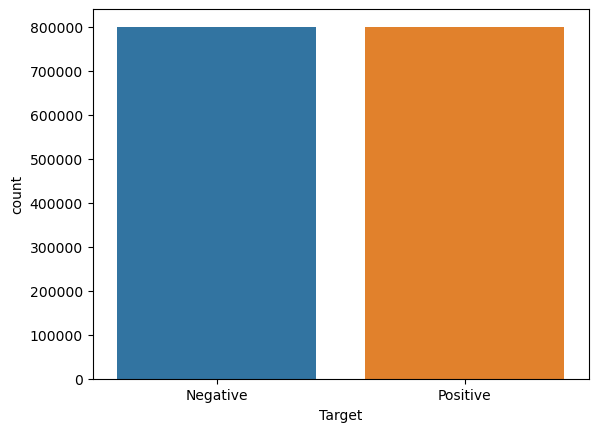

In [12]:
sns.countplot(data=df,x="Target")
plt.show()

In [13]:
fv=df.iloc[:,-1]
cv=df.iloc[:,0]

In [14]:
fv.head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: Text, dtype: object

In [15]:
cv.head()

0    Negative
1    Negative
2    Negative
3    Negative
4    Negative
Name: Target, dtype: object

In [16]:
def EDA_1(df):

    case = " ".join(df).islower()
    html = df.apply(lambda x:True if re.search("<.+?>",x) else False).sum()
    url = df.apply(lambda x:True if re.search("http[s]?://.+? +",x) else False).sum()
    unwanted = df.apply(lambda x:True if re.search("[]()*\-.:,@#$%&^!?/0-9']",x) else False).sum()

    count = 0
    for sen in data:
        for char in sen.split():
            if emoji.is_emoji(char):
                count += 1

    if case == False:
        print("Contains non lowercase letters")
    else:
        print('All are in lowercase letters')

    if html > 0:
        print("Contains html tags")
    else:
        print('No html tags')

    if url > 0:
        print("Contains urls")
    else:
        print('No urls')

    if unwanted > 0:
        print("Contains unwanted characters")
    else:
        print('No unwanted characters')

    if count > 0:
        print('Contains Emoji')
    else:
        print('No Emoji')

In [17]:
EDA_1(fv)

Contains non lowercase letters
No html tags
Contains urls
Contains unwanted characters
No Emoji


In [18]:
cv_encoding = LabelEncoder()

cv = cv_encoding.fit_transform(cv)

cv = pd.Series(cv)

cv.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [19]:
x_train,x_test,y_train,y_test = train_test_split(fv, cv, test_size= 0.2, random_state= 1, stratify= cv)


In [20]:
x_train,x_cv,y_train,y_cv = train_test_split(x_train, y_train, test_size= 0.2, random_state= 1, stratify= y_train)


In [21]:
x_train.head()

1160993    Mimis time! Carne asada was pretty bomb tonigh...
257015     sad to be going to the secret gathering withou...
780452                       Last day of college for summer 
329124     ok, bird just made me so sad! it tried to lay ...
365509     @michiFM i know and khloe/kourt! .IM SOO UPSET...
Name: Text, dtype: object

# 4.Pre-processing

In [22]:
def emoji_remove(x):

    x = x.apply(lambda x : emoji.demojize(x))

    return x

In [23]:
def lowercase(x):
    
     return x.str.lower()

In [24]:
def html_tags(x):
    
    x = x.apply(lambda x:re.sub("<.+?>"," ",x))

    return x

In [25]:
def urls(x):

    x = x.apply(lambda x : re.sub("https[s]?://.+? +"," ",x))

    return x

In [26]:
def unwanted_characters(x):

    x = x.apply(lambda x : re.sub("[]()*\-.:,@#$%&^!?/0-9']"," ",x))

    return x

In [27]:
def lemmatization(x):
    
    list_stp = stopwords.words("english")
    wl = WordNetLemmatizer()

    def lemmatize_text(text):
        
        words = word_tokenize(text)
        lemmatized_words = [wl.lemmatize(word, pos="v") for word in words if word not in list_stp]

        return " ".join(lemmatized_words)

    return x.apply(lemmatize_text)

In [28]:
preprocesser_pipe = Pipeline([('Lowercase', FunctionTransformer(lowercase)),
                              ('Html_Tags', FunctionTransformer(html_tags)),
                              ('Urls', FunctionTransformer(urls)),
                              ("Emoji's", FunctionTransformer(emoji_remove)),
                              ('Unwanted Characters', FunctionTransformer(unwanted_characters)),
                              ('Lemmatization',FunctionTransformer(lemmatization))])

In [29]:
preprocesser_pipe

Pipeline(steps=[('Lowercase',
                 FunctionTransformer(func=<function lowercase at 0x000001A5813F2C20>)),
                ('Html_Tags',
                 FunctionTransformer(func=<function html_tags at 0x000001A5813F3010>)),
                ('Urls',
                 FunctionTransformer(func=<function urls at 0x000001A5813F3400>)),
                ("Emoji's",
                 FunctionTransformer(func=<function emoji_remove at 0x000001A5813F28C0>)),
                ('Unwanted Characters',
                 FunctionTransformer(func=<function unwanted_characters at 0x000001A5813F3490>)),
                ('Lemmatization',
                 FunctionTransformer(func=<function lemmatization at 0x000001A5813F3B50>))])

# 5.EDA After Pre-processing

In [30]:
 import nltk
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
x_train = preprocesser_pipe.fit_transform(x_train)

eda_fv = pd.DataFrame(x_train, columns= ['Text'])

eda_cv = pd.DataFrame(y_train, columns= ['Target'])

eda_df = pd.concat([eda_fv, eda_cv], axis= 1)

In [32]:
eda_df

,Text,Target
1160993,mimis time carne asada pretty bomb tonight lov...,1
257015,sad go secret gather without kristers,0
780452,last day college summer,0
329124,ok bird make sad try lay egg miss nest little ...,0
365509,michifm know khloe kourt im soo upsetttt,0
...,...,...
1231100,ricoexplainsit right natch,1
1590612,hothusband_ oh yes kinda good girl years ago xd,1
1132136,go lake sunday babe lt ;,1
199494,ddlovato yesterday quot ; sonny chance quot ; ...,0


In [33]:
group = eda_df.groupby('Target')

In [34]:
nega=group.get_group(0)["Text"]
pos=group.get_group(1)["Text"]

In [35]:
nega

257015                sad go secret gather without kristers
780452                              last day college summer
329124    ok bird make sad try lay egg miss nest little ...
365509             michifm know khloe kourt im soo upsetttt
91769     gah sure write portion would study chem instea...
                                ...                        
592311        ready work early humansss baaaad nights sleep
184645    unfortunately think late net urgo tonight go w...
582843                          lee_twilight pisarem em mim
552842    yelyahwilliams ask staff acc bring cd back get...
199494    ddlovato yesterday quot ; sonny chance quot ; ...
Name: Text, Length: 512000, dtype: object

In [36]:
nega_words=" ".join(nega).split()

In [37]:
nega_words

['sad',
 'go',
 'secret',
 'gather',
 'without',
 'kristers',
 'last',
 'day',
 'college',
 'summer',
 'ok',
 'bird',
 'make',
 'sad',
 'try',
 'lay',
 'egg',
 'miss',
 'nest',
 'little',
 'egg',
 'break',
 'porch',
 'michifm',
 'know',
 'khloe',
 'kourt',
 'im',
 'soo',
 'upsetttt',
 'gah',
 'sure',
 'write',
 'portion',
 'would',
 'study',
 'chem',
 'instead',
 'bio',
 'full',
 'day',
 'review',
 'today',
 'well',
 'short',
 'visit',
 'dundee',
 'pick',
 'stuff',
 'feel',
 'like',
 'tink',
 'lidl',
 'bag',
 'full',
 'clothe',
 'miss',
 'damn',
 'bus',
 'eat',
 'mcdonalds',
 'way',
 'much',
 'keep_moving',
 'yeah',
 'yum',
 'unfortunately',
 'nyc',
 'get',
 'anymore',
 'two',
 'locales',
 'locate',
 'underneath',
 'penn',
 'station',
 'feel',
 'like',
 'everyone',
 'go',
 'go',
 'korea',
 'except',
 'hmph',
 'deepenguin',
 'think',
 'divas',
 'consider',
 'go',
 'work',
 'justify',
 'go',
 'dinner',
 'tonight',
 'ill',
 'find',
 'self',
 'drive',
 'work',
 'morning',
 'wish',
 'rain',

In [38]:
pos_words=" ".join(pos).split()

In [39]:
from collections import Counter
Counter(nega_words).most_common(10)

[('get', 65111),
 ('go', 61696),
 (';', 42880),
 ('work', 37720),
 ('miss', 30562),
 ('like', 27476),
 ('day', 26522),
 ('want', 25725),
 ('today', 24514),
 ('feel', 23554)]

In [40]:
from collections import Counter
Counter(pos_words).most_common(10)

[(';', 63485),
 ('get', 52384),
 ('go', 43628),
 ('good', 39536),
 ('love', 35749),
 ('thank', 32467),
 ('day', 30803),
 ('http', 30268),
 ('quot', 29410),
 ('like', 25793)]

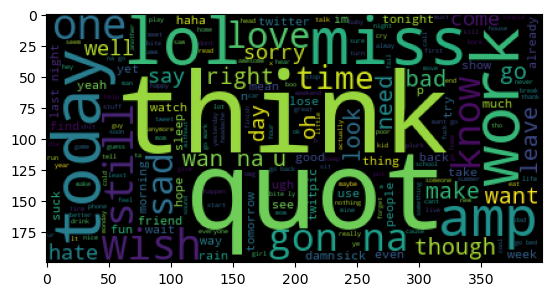

In [41]:
from wordcloud import WordCloud
wc = WordCloud().generate(" ".join(nega_words))
plt.imshow(wc)
plt.show()

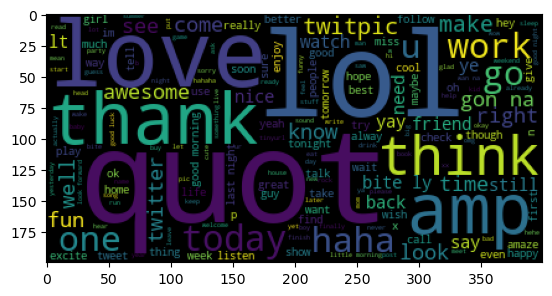

In [42]:
wc = WordCloud().generate(' '.join(pos_words))
plt.imshow(wc)
plt.show()

# 6. Feature Engineering

In [43]:
final_pipe = Pipeline([("pre_process",preprocesser_pipe),("vectorizer",CountVectorizer())])

In [44]:
final_pipe.fit_transform(x_train)

<1024000x449780 sparse matrix of type '<class 'numpy.int64'>'
	with 7562808 stored elements in Compressed Sparse Row format>

In [46]:
import pickle
pickle.dump(final_pipe,open(r"C:\Users\pavan\Desktop\satya\Machine learning\Projects\twitter_final.pkl","wb"))

# 7. Training

In [47]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,CategoricalNB

In [48]:
mb = MultinomialNB()
model = mb.fit(final_pipe.fit_transform(x_train),y_train)

In [49]:
pickle.dump(model,open(r"C:\Users\pavan\Desktop\satya\Machine learning\Projects\twitter_model.pkl","wb"))

# 8. Model Evaluation

In [50]:
from sklearn.metrics import accuracy_score , classification_report

In [51]:
accuracy_score(y_test,model.predict(final_pipe.transform(x_test))) 

0.760821875